In [232]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [233]:
import pandas as pd
import numpy as np
from keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
import utils
import os

main_dir =  os.path.join(os.path.dirname(os.getcwd()))

In [234]:
df = pd.read_csv(f'{main_dir}/data/dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['label'], test_size = 0.2, random_state=1)
y_train = utils.one_hot_encoding(y_train, 10)
y_test = utils.one_hot_encoding(y_test, 10)
X_train = utils.preprocessing(X_train.values)
X_test = utils.preprocessing(X_test.values)

## Model 1

This model has 5 dense hidden layers. The number of neurons in each layer is as follows:

*   Hidden Layer 1: 256 neurons
*   Hidden Layer 2: 128 neurons
*   Hidden Layer 3: 64 neurons
*   Hidden Layer 4: 32 neurons
*   Hidden Layer 5: 16 neurons

All hidden layers use the ReLU activation function and have L2 regularization with a value of 0.01. The model is trained using the Adam optimizer with a batch size of 32 and 10 epochs.

In [235]:
modelname = 'model1'

# Hyperparameters
optimizer = 'adam'
epochs = 10
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

/Users/luca/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model 1 has good performance even with a small number of epochs.

## Model 2

This model has the same architecture as Model 1, but all hidden layers have 256 neurons. It is also trained using the Adam optimizer with a batch size of 32 and 10 epochs.


In [236]:
modelname = 'model2'

# Hyperparameters
optimizer = 'adam'
epochs = 10
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

In [237]:
utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

In the Model 2 the accuracy and loss are better, more neurons give better results.

## Model 3
This model has the same architecture and hyperparameters as Model 1, but it uses L1 regularization instead of L2 regularization.


In [238]:
modelname = 'model3'

# Hyperparameters
optimizer = 'adam'
epochs = 10
batch_size = 32
regularizer = "l1"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

From the model 3, using the l1 regularization, we get a worse performance than the model 1.

## Model 4
This model has the same architecture and hyperparameters as Model 1, but it uses L1L2 regularization instead of L2 regularization.



In [240]:
modelname = 'model4'

# Hyperparameters
optimizer = 'adam'
epochs = 10
batch_size = 32
regularizer = "l1_l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 5
This model has the same architecture as Model 1, but with fewer layers and neurons per layer. It is trained using the Adam optimizer with an increased number of epochs (30) and a larger batch size (64). Additionally, the regularization value is increased to 0.1.


In [241]:
modelname = 'model5'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.1
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 6
This model has the same architecture and hyperparameters as Model 5, but the regularization value is decreased to 0.001.


In [242]:
modelname = 'model6'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.001
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

The regularization value plays an important role in the performance of the model.

## Model 13
This model use batch normalization after each dense layer.


In [243]:
modelname = 'model13'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 128
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

The batchnormalization improves the performance of the model with an high batch size.

## Model 7 
This model has the same architecture as Model 5, but it uses the tanh activation function instead of ReLU, and the initializer is changed to 'lecun\_normal'.


In [244]:
modelname = 'model7'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.01
initializer = 'lecun_normal'
activation = 'tanh'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 8
This model has the same architecture and hyperparameters as Model 7, but it uses the 'lecun\_uniform' initializer instead of 'lecun\_normal'.


In [245]:
modelname = 'model8'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.01
initializer = 'lecun_uniform'
activation = 'tanh'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 9

This model has the same architecture as Model 5, but it uses 7 dense hidden layers instead of 3.


In [246]:
modelname = 'model9'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.1
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

Again the regulization value is important for the performance of the model.

## Model 10

This model has the same architecture as Model 9, but it uses the sigmoid activation function instead of ReLU, and the initializer is changed to 'glorot\_normal'.


In [247]:
modelname = 'model10'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 128
regularizer = "l2"
regularizer_value = 0.01
initializer = 'glorot_normal'
activation = 'sigmoid'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(512, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 11

This model has the same architecture and hyperparameters as Model 10, but the batch size is decreased to 32.


In [248]:
modelname = 'model11'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'glorot_normal'
activation = 'sigmoid'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(512, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 12

This model uses the RMSprop optimizer instead of Adam.


In [249]:
modelname = 'model12'

# Hyperparameters
optimizer = 'rmsprop'
epochs = 30
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 14
This model uses the SGD optimizer instead of Adam.


In [250]:
modelname = 'model14'

# Hyperparameters
optimizer = 'SGD'
epochs = 30
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 15
This model uses the 'zeros' initializer instead of 'glorot\_normal'.


In [251]:
modelname = 'model15'

# Hyperparameters
optimizer = 'rmsprop'
epochs = 30
batch_size = 32
regularizer = "l2"
regularizer_value = 0.01
initializer = 'zeros'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train, y_train, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

# Data Augmentation

In [252]:
import tensorflow as tf
X_train_reshaped = X_train.reshape(-1, 28, 28, 1) # Assuming 28x28 grayscale images

# create and configure augmented image generator
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1, # randomly shift images horizontally (10% of total width)
    height_shift_range = 0.1, # randomly shift images vertically (10% of total height) 
    horizontal_flip = True ) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train_reshaped)

# Generate augmented images 
augmented_images = next(datagen_train.flow(X_train_reshaped, batch_size=len(X_train_reshaped), shuffle=False))

# Concatenate original and augmented data
X_train_augmented = np.concatenate((X_train_reshaped, augmented_images))
y_train_augmented = np.concatenate((y_train, y_train))  # Duplicate labels for augmented images

In [253]:
X_train.shape

(33600, 784)

In [254]:
X_train_augmented = X_train_augmented.reshape(-1, 784)
X_train_augmented.shape

(67200, 784)

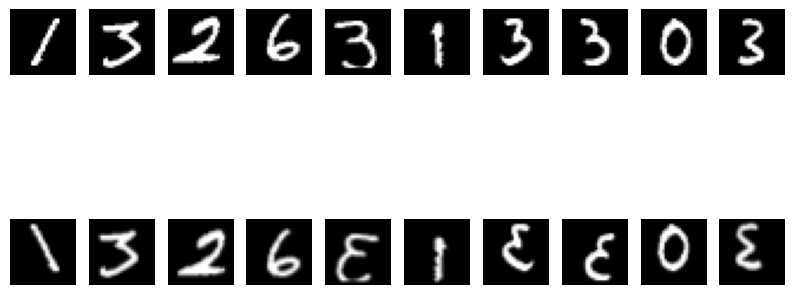

In [255]:
import matplotlib.pyplot as plt
# Plot the original and augmented images
plt.figure(figsize=(10, 5))
for i in range(10):
    # Plot original image
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_reshaped[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Plot augmented image
    plt.subplot(2, 10, i + 11)
    plt.imshow(augmented_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

## Model 1_da
This model is the same as Model 9, but it is trained on a dataset augmented with additional images generated by applying random transformations to the original training set.


In [256]:
modelname = 'model1_da'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.1
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train_augmented, y_train_augmented, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)

## Model 2_da
This model is the same as Model 1, but it is trained on a dataset augmented with additional images generated by applying random transformations to the original training set.


In [257]:
modelname = 'model2_da'

# Hyperparameters
optimizer = 'adam'
epochs = 30
batch_size = 64
regularizer = "l2"
regularizer_value = 0.01
initializer = 'he_normal'
activation = 'relu'

model = models.Sequential()

# Input layer
model.add(layers.Flatten(input_shape=(784,)))

model.add(layers.Dense(256, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(128, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(64, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(32, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))
model.add(layers.Dense(16, activation=activation, kernel_regularizer=getattr(regularizers, regularizer)(regularizer_value), kernel_initializer=initializer))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

utils.run_model(model, modelname, X_train_augmented, y_train_augmented, X_test, y_test, optimizer, epochs, batch_size, activation, regularizer, regularizer_value, initializer)